(720, 964)


Text(0.5, 1.0, 'Inpaint')

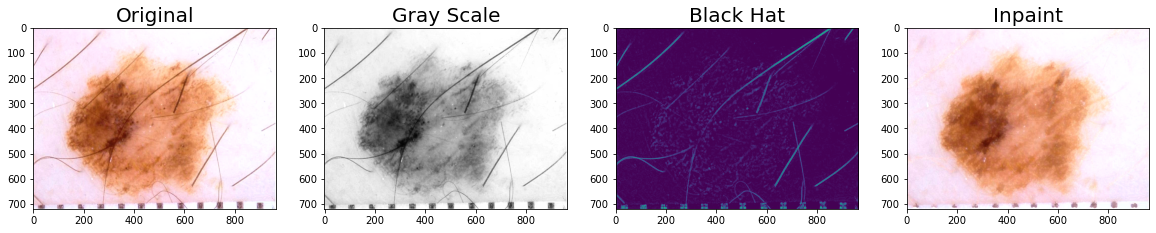

In [8]:
import cv2
from skimage.io import imread,imshow,imsave
from matplotlib import pyplot as plt


src = imread("C:/Users/Administrador/Meu Drive/Doutorado/UFES-Elétrica/Implementação Jacques Facon K means/Códigos/Artigo/DigitalHairRemoval-master/inputImages/sample4.PNG")

plt.figure(figsize=(20,10))

plt.subplot(141),plt.imshow(src)
plt.title('Original', size=20)

# Convert the original image to grayscale
grayScale = cv2.cvtColor( src, cv2.COLOR_RGB2GRAY )
plt.subplot(142),plt.imshow(grayScale,cmap=plt.cm.gray)
plt.title('Gray Scale', size=20)

# Kernel for the morphological filtering
kernel = cv2.getStructuringElement(1,(17,17))

# Perform the blackHat filtering on the grayscale image to find the 
# hair countours
blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
plt.subplot(143),plt.imshow(blackhat)
plt.title('Black Hat', size=20)

# intensify the hair countours in preparation for the inpainting 
# algorithm
ret,thresh2 = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
print( thresh2.shape )
plt.subplot(144),plt.imshow(thresh2)
plt.title('Intensify Hair', size=20)

# inpaint the original image depending on the mask
dst = cv2.inpaint(src,thresh2,1,cv2.INPAINT_TELEA)
plt.imshow(dst)
plt.title('Inpaint', size=20)
